In [1]:
import random
import socket
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
import sklearn.decomposition
%matplotlib inline
import vsmlib
import brewer2mpl
import pandas
from pandas.tools.plotting import parallel_coordinates
mpl.rcParams['figure.figsize'] = (17.5, 8.0)

In [2]:
if socket.gethostname()=="cypress":
    dir_root="/storage/scratch/SVD/explicit_BNC_w3_pos_svd_400_C0.1/"    
    dir_root="/storage/scratch/SVD/explicit_Giga_2w_svd_500_C0.6/"
if socket.gethostname()=="ashtree":  
    dir_root="/mnt/work/nlp_scratch/SVD/explicit_Giga_2w_svd_500_C0.6/"
    #dir_root="/mnt/work/nlp_scratch/test"
if socket.gethostname()=="rc017.m.gsic.titech.ac.jp":
    dir_root="/home/blackbird/data/scratch/sparse/Russian/proza.ru_raw_w2/"    
    #dir_root="/home/blackbird/data/scratch/sparse/test/"    

In [3]:
m=vsmlib.model.load_from_dir(dir_root)

this is sparse explicit
Matrix loaded in 1.36 sec
Matrix dimentions : (451803, 451803) (451.8K unique words in the corpus )
Would take 760.4GiB if stored in dense format
Cnt nonzero elements = 274457098 (should take about 1.0GiB of memory space
Sparsity = 0.1345%


In [4]:
m.name

'explicit_proza.ru_raw_w2'

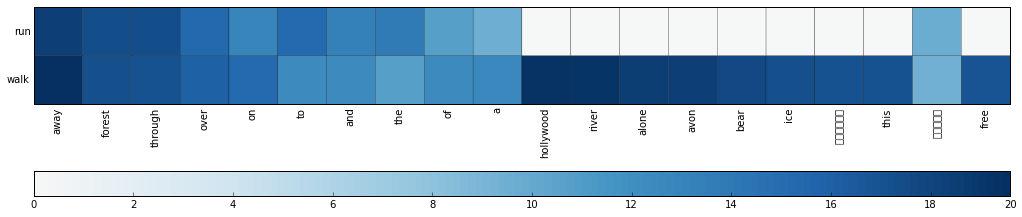

In [5]:
from vsmlib.visualize import draw_features
draw_features(m,["walk","run"])

In [6]:
row=m.get_row("кошка").todense()
row=np.asarray(row).reshape(-1)

In [7]:
#print(m.vocabulary.get_id("man"))
#m.vocabulary.get_word_by_id(3)
#for i in row.argsort()[-3:][::-1]:


In [11]:
for i in row.argsort()[-20:][::-1]:
    print (m.vocabulary.get_word_by_id(i),row[i])

сиамская 14.2314
ангорская 14.0395
трёхцветная 13.5928
трехцветная 13.4534
нашкодившая 13.0469
окотилась 12.917
драная 12.7845
мартовская 12.6287
белогрудка 12.536
звёздная 12.2286
гуляющая 12.1021
камышовая 12.0874
замяукала 11.9938
дымчатая 11.99
мяукнула 11.881
пятнистая 11.6602
промяукала 11.657
шкодливая 11.567
рыжка 11.5073
загулявшая 11.45


In [10]:
name_file_nouns="../data/sitting/NounList"
lst_nouns = [s.strip() for s in open(name_file_nouns).readlines()]
lst_nouns[:5]

['год', 'человек', 'время', 'дело', 'жизнь']

In [11]:
lst_w_features=["сидит","села","сел","сидела","сидел"]
lst_pos_features=[m.vocabulary.get_id(i) for i in lst_w_features]

In [12]:
lst_results=[]
for w in lst_nouns:
    id_w=m.vocabulary.get_id(w)
    coef=0;
    for f in lst_pos_features:
        if m.matrix[id_w,f]>0:
            coef+=m.matrix[id_w,f]
    lst_results.append((w,coef))
lst_results[:10]

[('год', 1.6206044554710388),
 ('человек', 8.7104455232620239),
 ('время', 6.096189022064209),
 ('дело', 0),
 ('жизнь', 0),
 ('день', 3.6389289498329163),
 ('рука', 0),
 ('раз', 1.2701685726642609),
 ('работа', 0),
 ('слово', 0)]

In [24]:
lst_results.sort(key=lambda x:x[1])
lst_results.reverse()

In [25]:
f=open("sorted_sit.txt","w")
for i in lst_results:
    f.write(str(i[0])+",\t"+str(i[1])+"\n")
f.close()

In [23]:
a=[1,2,3]
a.reverse()

(-1, 17)

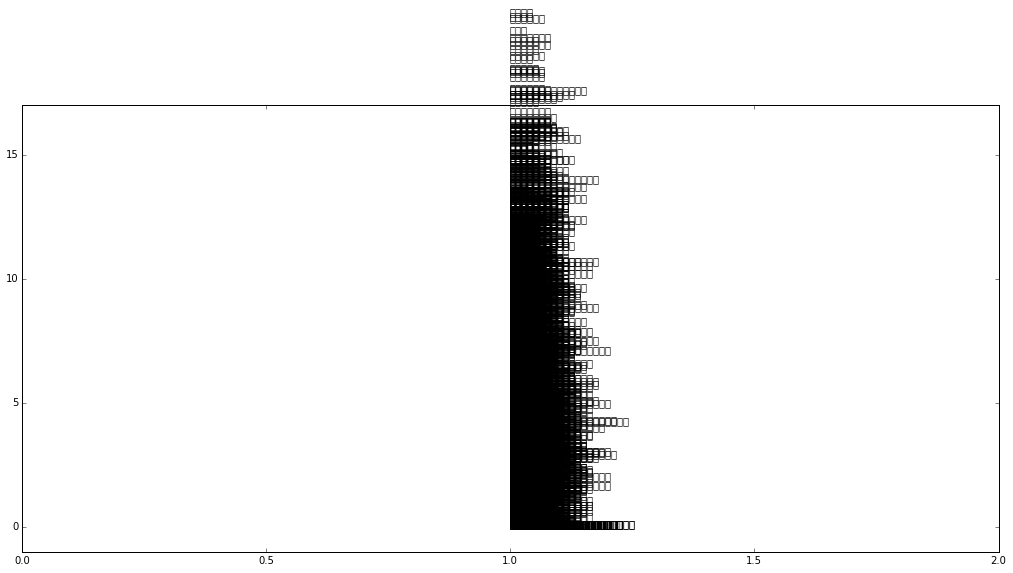

In [15]:
ax = plt.subplot('111')
for i in lst_results:
    plt.text(1,i[1],i[0])
ax.set_xlim(0,2)
ax.set_ylim(-1,17)